In [69]:
#we need to dtop 6080

In [70]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
from ipyvizzu import Chart, Data, Config, Style
from IPython.display import display
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [71]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('Equites_Historical_Adjusted_Prices_Report.csv' , index_col=False)


### Viewing the dataframe

In [72]:
df

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
0,Banks,1010,Riyad Bank,07-MAR-24,30.50,31.55,30.35,30.80,0.50,1.65,2246609,6.956108e+07,3541
1,Banks,1010,Riyad Bank,10-MAR-24,30.80,30.80,30.20,30.60,-0.20,-0.65,388346,1.185622e+07,1170
2,Banks,1010,Riyad Bank,07-DEC-23,26.70,26.95,26.50,26.95,0.10,0.37,2811747,7.470712e+07,1552
3,Banks,1010,Riyad Bank,10-DEC-23,27.00,27.40,26.95,27.25,0.30,1.11,841507,2.288634e+07,1231
4,Banks,1010,Riyad Bank,07-JAN-24,29.00,29.50,29.00,29.10,0.30,1.04,2713132,7.943083e+07,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636339,Insurance,8312,Alinma Tokio Marine Co.,01-JUL-12,72.50,72.50,68.00,67.99,-3.96,-5.50,4342390,3.039200e+08,9500
636340,Insurance,8312,Alinma Tokio Marine Co.,02-JUL-12,67.75,68.75,66.25,66.45,-1.54,-2.27,1693627,1.145310e+08,5033
636341,Insurance,8312,Alinma Tokio Marine Co.,03-JUL-12,66.50,69.25,66.50,68.22,1.77,2.66,2501932,1.701071e+08,6175
636342,Insurance,8312,Alinma Tokio Marine Co.,09-JUL-12,67.00,67.00,65.00,65.13,-2.20,-3.27,1110951,7.332408e+07,3736


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636344 entries, 0 to 636343
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Industry Group      636344 non-null  object 
 1   Symbol              636344 non-null  int64  
 2   Company Name        636344 non-null  object 
 3   Date                636344 non-null  object 
 4   Open                636344 non-null  float64
 5   High                636344 non-null  float64
 6   Low                 636344 non-null  float64
 7   Close               636344 non-null  float64
 8   Change              636344 non-null  float64
 9   % Change            636344 non-null  float64
 10  Volume Traded       636344 non-null  int64  
 11  Value Traded (SAR)  636344 non-null  float64
 12  No. of Trades       636344 non-null  int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 63.1+ MB


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symbol,636344.0,4.117134e+03,2.350537e+03,1010.00,2170.000,4020.00,6.010000e+03,8.312000e+03
Open,636344.0,3.306109e+01,3.740302e+01,0.00,13.360,22.40,3.960000e+01,1.089000e+03
High,636344.0,3.351346e+01,3.800079e+01,0.00,13.540,22.70,4.010000e+01,1.125000e+03
Low,636344.0,3.264339e+01,3.687201e+01,0.00,13.210,22.10,3.905000e+01,1.051200e+03
Close,636344.0,3.337211e+01,3.736099e+01,0.00,13.540,22.52,3.988000e+01,1.080000e+03
Change,636344.0,-1.186669e-03,1.544109e+00,-190.78,-0.200,0.00,1.900000e-01,1.678100e+02
% Change,636344.0,3.613868e-02,2.195771e+00,-100.00,-0.840,0.00,8.200000e-01,3.518500e+02
Volume Traded,636344.0,2.345033e+06,1.389170e+07,0.00,157039.250,430281.00,1.239598e+06,2.101370e+09
Value Traded (SAR),636344.0,3.224118e+07,3.363776e+08,0.00,3920244.055,10773819.95,2.757156e+07,2.592464e+11
No. of Trades,636344.0,1.044616e+03,2.206623e+03,0.00,226.000,504.00,1.120000e+03,5.402480e+05


In [75]:
df.dtypes

Industry Group         object
Symbol                  int64
Company Name           object
Date                   object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Change                float64
% Change              float64
Volume Traded           int64
Value Traded (SAR)    float64
No. of Trades           int64
dtype: object

In [76]:
# ProfileReport(df, title="Pandas Profiling Report")

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 

In [77]:
## all of them are relevencce

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [78]:
# Group by 'Symbol' and 'Date' and count the occurrences for each group
duplicate_entries = df.groupby(['Symbol', 'Date']).size().reset_index(name='count')

# Filter out groups where count is greater than 1 (i.e., multiple records on the same day)
duplicates = duplicate_entries[duplicate_entries['count'] > 1]

# Merge back with the original DataFrame to get full details of the duplicates
df_duplicates = pd.merge(df, duplicates[['Symbol', 'Date']], on=['Symbol', 'Date'], how='inner')
df_duplicates

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
0,Tadawul All Share Index (TASI),1040,Alawwal Bank,15-MAY-19,17.50,17.50,17.10,17.36,0.46,2.72,1401871,2.416518e+07,538
1,Tadawul All Share Index (TASI),1040,Alawwal Bank,15-MAY-19,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000000e+00,0
2,Banks,1090,Samba Financial Group,31-MAR-21,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000000e+00,0
3,Banks,1090,Samba Financial Group,31-MAR-21,38.50,39.10,37.80,38.50,1.70,4.62,8954421,3.438283e+08,3122
4,Materials,2002,National Petrochemical Co.,10-APR-22,45.85,46.00,45.40,45.45,-0.60,-1.30,102240,4.661417e+06,416
5,Materials,2002,National Petrochemical Co.,10-APR-22,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000000e+00,0
6,Capital Goods,2110,Saudi Cable Co.,08-MAY-22,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000000e+00,0
7,Capital Goods,2110,Saudi Cable Co.,08-MAY-22,0.00,0.00,0.00,0.00,-57.20,0.00,0,0.000000e+00,0
8,Capital Goods,2110,Saudi Cable Co.,08-MAY-22,59.80,59.80,56.96,57.20,-4.17,-6.79,224638,1.292735e+07,2403
9,Materials,2260,Sahara Petrochemical Co.,16-MAY-19,17.30,17.48,17.30,17.46,0.20,1.16,3858673,6.713051e+07,1202


In [79]:
# Define the columns that should have valid data
important_columns = ['Open', 'High', 'Low', 'Close', 'Volume Traded', 'Value Traded (SAR)', 'No. of Trades']

# Sort by the important columns in descending order (valid values first)
df = df.sort_values(by=important_columns, ascending=False)

# Drop duplicates, keeping the first valid row for each 'Symbol' and 'Date'
df = df.drop_duplicates(subset=['Symbol', 'Date'], keep='first')

# Reset the index for cleanliness
df.reset_index(drop=True, inplace=True)

# Check for any remaining duplicates
df.duplicated(subset=['Symbol', 'Date']).sum()  # Should return 0 if all duplicates are removed


0

In [80]:
# Group by 'Symbol' and 'Date' and count the occurrences for each group
duplicate_entries = df.groupby(['Symbol', 'Date']).size().reset_index(name='count')

# Filter out groups where count is greater than 1 (i.e., multiple records on the same day)
duplicates = duplicate_entries[duplicate_entries['count'] > 1]

# Merge back with the original DataFrame to get full details of the duplicates
df_duplicates = pd.merge(df, duplicates[['Symbol', 'Date']], on=['Symbol', 'Date'], how='inner')
df_duplicates

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [81]:
df.isna().sum()

Industry Group        0
Symbol                0
Company Name          0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Change                0
% Change              0
Volume Traded         0
Value Traded (SAR)    0
No. of Trades         0
dtype: int64

In [82]:
dfzeroz = df[df['High'] == 0]
dfzeroz['Symbol'].unique()

array([2110, 2270, 6004, 2030, 2200, 1213, 7020, 4100, 4008, 3050, 7040,
       6080, 4004, 2360, 6012, 8310, 4240, 4140, 2002, 2300, 4070, 3040,
       4007, 8180, 3080, 6001, 8050, 2170, 6002, 4002, 2250, 8130, 1090,
       2210, 1301, 1060, 6050, 4250, 8030, 2160, 1050, 8011, 2070, 4230,
       1180, 3010, 4003, 1202, 8110, 2080, 2240, 4010, 8312, 2220, 2001,
       1214, 4290, 8060, 6070, 8070, 1040, 7010, 3003, 2370, 8290, 1210,
       8150, 4210, 8220, 2150, 8311, 3090, 1810, 4040, 2260, 4331, 4160,
       6040, 4006, 1080, 8170, 1212, 1320, 4050, 8270, 2380, 1820, 2140,
       8120, 8090, 8140, 1201, 4333, 4011, 2100, 8100, 8080, 8260, 7030,
       2340, 3091, 4342, 8190, 1310, 4344, 2090, 2130, 4348, 4020, 4338,
       8020, 4280, 1030, 4340, 4345, 4347, 4349, 4334, 4336, 4335, 8200,
       4346, 4337, 4332, 1330, 4001, 4180, 1140, 1303, 4061, 4170, 4130,
       4030, 7050], dtype=int64)

In [83]:
dfzeroz[dfzeroz['Symbol'] == 7020].tail(20)

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
626978,Telecommunication Services,7020,Etihad Etisalat Co.,06-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626979,Telecommunication Services,7020,Etihad Etisalat Co.,07-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626980,Telecommunication Services,7020,Etihad Etisalat Co.,08-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626981,Telecommunication Services,7020,Etihad Etisalat Co.,09-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626982,Telecommunication Services,7020,Etihad Etisalat Co.,12-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626983,Telecommunication Services,7020,Etihad Etisalat Co.,13-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626984,Telecommunication Services,7020,Etihad Etisalat Co.,14-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626985,Telecommunication Services,7020,Etihad Etisalat Co.,15-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626986,Telecommunication Services,7020,Etihad Etisalat Co.,22-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0
626987,Telecommunication Services,7020,Etihad Etisalat Co.,28-JUL-15,0.0,0.0,0.0,33.80,0.0,0.0,0,0.0,0


In [84]:
# Assuming df_cleaned is your DataFrame

# Filter the DataFrame for rows where 'High' is zero
zero_highs = df[df['High'] == 0]

# Group by 'Symbol' and count the number of zero occurrences for 'High'
zero_counts = zero_highs.groupby('Symbol').size().reset_index(name='Zero Days')

# Display the result
zero_counts['Zero Days'].values

array([   2,   14,    1,    1,    3,    3,    1,    1,    2,    2,    1,
          4,    8,    2,    4,    2, 1195,    1,  696,    1,    5,    2,
          4,    3,    2,    1,    1,   25,  817,    1,    2,   11,    6,
        150,   46,    5,    2,    2,    1,    2,    1,   16,    5,   16,
          7,    1,    2,    1,    1,    4,   10,    6,    2,    2,    8,
          1,    1,    2,    4,    6,    6,    1,    1,    1,    1,    1,
          5,  141,   15, 1043,   45,  863,    2,    3,    7,    7,    3,
          1,    1,    3,    1,   12,   42,   18,    6,   17,   19,   13,
          2,   10,   26,   80,   10,   56,   15,    3,    7,    1,    1,
          3,    3,    3,    1, 1816,    1,   49,    5,  877,   58,   10,
          1,   18,    5,    3,    1,    4,  675,    3,  902,    5,    3,
          4,   41,    5,  137,    8,    2,  778,    2,   21,    4,    5,
          6,    3], dtype=int64)

In [85]:
zero_counts[zero_counts['Zero Days'] == 49]

,Symbol,Zero Days
105,7020,49


In [86]:
# Step 1: Count the number of zero days for each stock
zero_day_counts = df[df['High'] == 0].groupby('Symbol').size()

# Step 2: Identify stocks with more than 100 zero days
stocks_to_drop = zero_day_counts[zero_day_counts > 100].index

# Step 3: Create the DataFrame with dropped stocks
df_dropped_stocks = df[~df['Symbol'].isin(stocks_to_drop)]

# The DataFrame with all stocks remains unchanged
df_all_stocks = df.copy()

# Optionally, reset index for both DataFrames for cleanliness
df_dropped_stocks.reset_index(drop=True, inplace=True)
df_all_stocks.reset_index(drop=True, inplace=True)


In [87]:
#Display number missing values per column

price_columns = ['Open', 'High', 'Low', 'Close']

# Replace zeros with NaN in price columns to indicate missing data
df_all_stocks[price_columns] = df_all_stocks[price_columns].replace(0, pd.NA)

# Sort by 'Date' to maintain chronological order
df_all_stocks = df_all_stocks.sort_values(by=['Symbol', 'Date'])

# Create a function to fill missing prices with the previous 'Close' price
def fill_with_previous_close(group):
    # Forward-fill the 'Close' column first
    group['Close'] = group['Close'].fillna(method='ffill')
    
    # Fill 'Open', 'High', and 'Low' with the previous 'Close' price
    group['Open'] = group['Open'].fillna(group['Close'])
    group['High'] = group['High'].fillna(group['Close'])
    group['Low'] = group['Low'].fillna(group['Close'])
    
    return group

# Apply the function grouped by 'Symbol' to ensure stock-specific filling
df_cleaned = df_all_stocks.groupby('Symbol').apply(fill_with_previous_close)

# Reset index if needed
df_cleaned.reset_index(drop=True, inplace=True)

# Keep the 'Volume Traded', 'Value Traded (SAR)', and 'No. of Trades' columns as they are
# since they should remain zero or NaN where no trading activity occurred

C:\Users\osama\AppData\Local\Temp\ipykernel_5508\1620212899.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Close'] = group['Close'].fillna(method='ffill')
C:\Users\osama\AppData\Local\Temp\ipykernel_5508\1620212899.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group['Close'] = group['Close'].fillna(method='ffill')
C:\Users\osama\AppData\Local\Temp\ipykernel_5508\1620212899.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group['Open'] = group[

In [88]:
df.isna().sum()

Industry Group        0
Symbol                0
Company Name          0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Change                0
% Change              0
Volume Traded         0
Value Traded (SAR)    0
No. of Trades         0
dtype: int64

In [89]:
# go to clean them 
df_cleaned[(df_cleaned['Symbol'] == 4001) & (df_cleaned['Date'] == '31-OCT-17')].tail(30)

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
287967,Consumer Staples Distribution & Retail,4001,Abdullah Al Othaim Markets Co.,31-OCT-17,6.06,6.06,6.06,6.06,-0.01,-0.16,16520,99414.8,30


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [90]:
# check columns types 
df_cleaned.dtypes

Industry Group         object
Symbol                  int64
Company Name           object
Date                   object
Open                   object
High                   object
Low                    object
Close                  object
Change                float64
% Change              float64
Volume Traded           int64
Value Traded (SAR)    float64
No. of Trades           int64
dtype: object

In [91]:
# go to clean them 
# Define the price-related columns
price_columns = ['Open', 'High', 'Low', 'Close']

# Convert 'Open', 'High', 'Low', 'Close' columns to numeric, forcing any non-numeric values to NaN
df_cleaned[price_columns] = df_cleaned[price_columns].apply(pd.to_numeric, errors='coerce')

# Now check for NaN values again
df_cleaned.isna().sum()


Industry Group        0
Symbol                0
Company Name          0
Date                  0
Open                  6
High                  6
Low                   6
Close                 6
Change                0
% Change              0
Volume Traded         0
Value Traded (SAR)    0
No. of Trades         0
dtype: int64

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [92]:
# Group by 'Symbol' and 'Date' and count the occurrences for each group
duplicate_entries = df.groupby(['Symbol', 'Date']).size().reset_index(name='count')

# Filter out groups where count is greater than 1 (i.e., multiple records on the same day)
duplicates = duplicate_entries[duplicate_entries['count'] > 1]

# Merge back with the original DataFrame to get full details of the duplicates
df_duplicates = pd.merge(df, duplicates[['Symbol', 'Date']], on=['Symbol', 'Date'], how='inner')

In [93]:
df_cleaned.isna().sum()

Industry Group        0
Symbol                0
Company Name          0
Date                  0
Open                  6
High                  6
Low                   6
Close                 6
Change                0
% Change              0
Volume Traded         0
Value Traded (SAR)    0
No. of Trades         0
dtype: int64

### Correcting errors

-------------------

In [94]:
df_cleaned.head

<bound method NDFrame.head of        Industry Group  Symbol             Company Name       Date   Open  \
0               Banks    1010               Riyad Bank  01-APR-12  12.90   
1               Banks    1010               Riyad Bank  01-APR-13  11.45   
2               Banks    1010               Riyad Bank  01-APR-14  17.45   
3               Banks    1010               Riyad Bank  01-APR-15  16.90   
4               Banks    1010               Riyad Bank  01-APR-18  13.86   
...               ...     ...                      ...        ...    ...   
636326      Insurance    8312  Alinma Tokio Marine Co.  31-OCT-17  22.08   
636327      Insurance    8312  Alinma Tokio Marine Co.  31-OCT-18  17.38   
636328      Insurance    8312  Alinma Tokio Marine Co.  31-OCT-19  10.80   
636329      Insurance    8312  Alinma Tokio Marine Co.  31-OCT-21  30.80   
636330      Insurance    8312  Alinma Tokio Marine Co.  31-OCT-22  17.28   

         High    Low  Close  Change  % Change  Volume Tra

In [95]:
# go back to 7th dimension Accuracy 
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%b-%y', errors='coerce')

# Sort the DataFrame by 'Symbol' and 'Date'
df_cleaned = df_cleaned.sort_values(by=['Symbol', 'Date'])
df_cleaned[df_cleaned['Symbol'] == 8312]

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
635693,Insurance,8312,Alinma Tokio Marine Co.,2012-06-24,79.00,88.00,64.25,68.22,68.22,0.00,17134018,1.205824e+09,162710
635786,Insurance,8312,Alinma Tokio Marine Co.,2012-06-25,67.75,68.50,62.00,62.49,-5.73,-8.40,5805492,3.766516e+08,31439
635882,Insurance,8312,Alinma Tokio Marine Co.,2012-06-26,63.50,68.75,63.00,68.65,6.16,9.86,9255201,6.217863e+08,21630
635976,Insurance,8312,Alinma Tokio Marine Co.,2012-06-27,69.75,72.25,64.75,67.99,-0.66,-0.96,12215036,8.462018e+08,25575
636231,Insurance,8312,Alinma Tokio Marine Co.,2012-06-30,70.25,73.25,69.25,71.95,3.96,5.82,7252217,5.184693e+08,14663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635278,Insurance,8312,Alinma Tokio Marine Co.,2023-10-19,12.64,13.10,12.62,12.62,-0.08,-0.63,438989,5.624748e+06,1350
635553,Insurance,8312,Alinma Tokio Marine Co.,2023-10-22,12.62,13.64,12.52,13.08,0.46,3.65,1174389,1.550609e+07,3091
635645,Insurance,8312,Alinma Tokio Marine Co.,2023-10-23,13.02,13.22,12.62,12.76,-0.32,-2.45,531690,6.852240e+06,1843
635733,Insurance,8312,Alinma Tokio Marine Co.,2023-10-24,12.70,12.84,12.06,12.80,0.04,0.31,765899,9.519565e+06,2425


In [96]:
# Sample function to calculate Change and % Change while retaining the first observation
def calculate_changes(group):
    # Store the first Close value
    first_close = group['Close'].iloc[0]
    
    # Calculate Change: Difference between current and previous Close
    group['Change'] = group['Close'].diff()
    
    # If it is the first observation, set Change to 0
    group['Change'].iloc[0] = 0  # or use `first_close` if you want to keep the original
    
    # Calculate % Change: (Change / Previous Close) * 100
    group['% Change'] = (group['Change'] / group['Close'].shift(1)) * 100
    group['% Change'].iloc[0] = 0  # or use `None` if you prefer

    # Round the values to 2 decimal places
    group['Change'] = group['Change'].round(2)
    group['% Change'] = group['% Change'].round(2)

    return group

# Apply the function grouped by 'Symbol'
df_cleaned = df_cleaned.groupby('Symbol').apply(calculate_changes)

# Reset index if needed
df_cleaned.reset_index(drop=True, inplace=True)


C:\Users\osama\AppData\Local\Temp\ipykernel_5508\3577657447.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group['Change'].iloc[0] = 0  # or use `first_close` if you want to keep the original
C:\Users\osama\AppData\Local\Temp\ipykernel

In [97]:
df_cleaned

,Industry Group,Symbol,Company Name,Date,Open,High,Low,Close,Change,% Change,Volume Traded,Value Traded (SAR),No. of Trades
0,Banks,1010,Riyad Bank,2010-02-10,13.90,14.05,13.90,13.90,0.00,0.00,203386,2840455.90,94
1,Banks,1010,Riyad Bank,2010-02-13,13.95,14.00,13.90,13.90,0.00,0.00,149568,2089151.40,72
2,Banks,1010,Riyad Bank,2010-02-14,14.00,14.10,13.90,13.95,0.05,0.36,422108,5903932.60,141
3,Banks,1010,Riyad Bank,2010-02-15,14.00,14.05,13.95,14.00,0.05,0.36,492464,6895206.80,113
4,Banks,1010,Riyad Bank,2010-02-16,14.00,14.10,14.00,14.10,0.10,0.71,898348,12643591.50,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636326,Insurance,8312,Alinma Tokio Marine Co.,2023-10-19,12.64,13.10,12.62,12.62,-0.08,-0.63,438989,5624748.22,1350
636327,Insurance,8312,Alinma Tokio Marine Co.,2023-10-22,12.62,13.64,12.52,13.08,0.46,3.65,1174389,15506086.40,3091
636328,Insurance,8312,Alinma Tokio Marine Co.,2023-10-23,13.02,13.22,12.62,12.76,-0.32,-2.45,531690,6852239.84,1843
636329,Insurance,8312,Alinma Tokio Marine Co.,2023-10-24,12.70,12.84,12.06,12.80,0.04,0.31,765899,9519564.54,2425


## feature engneering 

In [98]:
import pandas as pd
import numpy as np
import ta  # Technical Analysis library

def extract_time_features(df):
    """
    Extract time-based features from the 'Date' column.
    """
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Quarter'] = df['Date'].dt.quarter
    return df

def create_rolling_features(df, window_sizes):
    """
    Create rolling window features for multiple window sizes.
    """
    for window in window_sizes:
        # Rolling functions applied per stock ('Symbol')
        df[f'RollingMean_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift().rolling(window=window, min_periods=1).mean())
        df[f'RollingStd_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift().rolling(window=window, min_periods=1).std())
        df[f'RollingMin_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift().rolling(window=window, min_periods=1).min())
        df[f'RollingMax_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift().rolling(window=window, min_periods=1).max())
    return df

def create_technical_indicators(df):
    """
    Calculate technical indicators like MACD, RSI, and Bollinger Bands.
    """
    def calculate_indicators(group):
        # Shift 'Close' to avoid data leakage
        close = group['Close'].shift()

        # MACD
        macd_indicator = ta.trend.MACD(close)
        group['MACD'] = macd_indicator.macd()
        group['MACDSignal'] = macd_indicator.macd_signal()
        
        # RSI
        rsi_indicator = ta.momentum.RSIIndicator(close)
        group['RSI'] = rsi_indicator.rsi()
        
        # Bollinger Bands
        bollinger_indicator = ta.volatility.BollingerBands(close)
        group['BB_Upper'] = bollinger_indicator.bollinger_hband()
        group['BB_Middle'] = bollinger_indicator.bollinger_mavg()
        group['BB_Lower'] = bollinger_indicator.bollinger_lband()
        
        return group

    # Apply technical indicators per stock ('Symbol')
    df = df.groupby('Symbol').apply(calculate_indicators)
    df.reset_index(drop=True, inplace=True)
    return df

def create_lagged_features(df, lag_periods):
    """
    Create lagged features for specified periods.
    """
    for lag in lag_periods:
        df[f'Close_lag_{lag}'] = df.groupby('Symbol')['Close'].shift(lag)
    return df

def handle_missing_values(df):
    """
    Handle missing values appropriately to avoid data leakage.
    """
    # Drop rows with any NaN values resulting from feature engineering
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# Feature Engineering Code Block
# Assuming 'df_cleaned' is your cleaned DataFrame from the cleaning code

# Extract time-based features
df_features = extract_time_features(df_cleaned)

# Define multiple window sizes and lag periods
window_sizes = [5, 10, 20]  # You can adjust these values
lag_periods = [1, 2, 3, 5, 7, 10]  # You can adjust these values

# Create rolling window features
df_features = create_rolling_features(df_features, window_sizes)

# Create technical indicators
df_features = create_technical_indicators(df_features)

# Create lagged features
df_features = create_lagged_features(df_features, lag_periods)

# Handle missing values resulting from feature engineering
df_features = handle_missing_values(df_features)

# The DataFrame 'df_features' is now ready for modeling
# You can proceed with your modeling pipeline

# Optional: Save the processed DataFrame to a CSV file
# df_features.to_csv('processed_data.csv', index=False)


C:\Users\osama\AppData\Local\Temp\ipykernel_5508\3811352547.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Symbol').apply(calculate_indicators)


In [99]:
df_features.columns

Index(['Industry Group', 'Symbol', 'Company Name', 'Date', 'Open', 'High',
       'Low', 'Close', 'Change', '% Change', 'Volume Traded',
       'Value Traded (SAR)', 'No. of Trades', 'Day', 'Month', 'Year',
       'DayOfWeek', 'Quarter', 'RollingMean_5', 'RollingStd_5', 'RollingMin_5',
       'RollingMax_5', 'RollingMean_10', 'RollingStd_10', 'RollingMin_10',
       'RollingMax_10', 'RollingMean_20', 'RollingStd_20', 'RollingMin_20',
       'RollingMax_20', 'MACD', 'MACDSignal', 'RSI', 'BB_Upper', 'BB_Middle',
       'BB_Lower', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_5',
       'Close_lag_7', 'Close_lag_10'],
      dtype='object')

In [100]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, explained_variance_score

# # Read the CSV file
# df = df_features.copy()

# # Select a specific stock
# selected_stock = 5110 # Replace with the desired stock symbol
# selected_df = df[df['Symbol'] == selected_stock]

# # Get the company name for the selected stock
# company_name = selected_df['Company Name'].iloc[0]

# # Define the feature columns
# feature_columns = ["% Change" ,'RollingMean_10', 'MACD', 'RSI']

# # Create a new DataFrame with only the feature columns and the 'Close' column
# data = selected_df[feature_columns + ['Close']]

# # Create a DatetimeIndex using the 'Year', 'Month', and 'Day' columns
# data.index = pd.to_datetime(selected_df[['Year', 'Month', 'Day']])

# # Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(data)

# # Split the data into training and testing sets
# train_data = scaled_data[:int(len(scaled_data) * 0.8)]
# test_data = scaled_data[int(len(scaled_data) * 0.8):]

# # Prepare the training data
# x_train = []
# y_train = []
# for i in range(100, len(train_data)):
#     x_train.append(train_data[i - 100:i, :-1])
#     y_train.append(train_data[i, -1])
# x_train, y_train = np.array(x_train), np.array(y_train)

# # Prepare the testing data
# x_test = []
# y_test = []
# for i in range(100, len(test_data)):
#     x_test.append(test_data[i - 100:i, :-1])
#     y_test.append(test_data[i, -1])
# x_test, y_test = np.array(x_test), np.array(y_test)

# # Reshape the input data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(x_train, y_train, batch_size=4, epochs=10)

# # Make predictions
# predictions = model.predict(x_test)

# # Inverse transform the predictions and actual values
# inv_predictions = scaler.inverse_transform(np.concatenate((x_test[:, -1, :], predictions), axis=1))[:, -1]
# inv_y_test = scaler.inverse_transform(np.concatenate((x_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]


# # Create a DataFrame for plotting
# plotting_data = pd.DataFrame(
#     {
#         'Original Close Price': inv_y_test,
#         'Predicted Close Price': inv_predictions
#     },
#     index=data.index[-len(inv_y_test):]
# )

# # Plot the original close price and predicted close price
# plt.figure(figsize=(12, 6))
# plt.plot(plotting_data['Original Close Price'], label='Original Close Price')
# plt.plot(plotting_data['Predicted Close Price'], label='Predicted Close Price')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title(f'Original vs. Predicted Close Price for {company_name}')  # Add company name as the title
# plt.legend()
# plt.show()

# # Calculate the accuracy and other performance measurements
# mse = mean_squared_error(inv_y_test, inv_predictions)
# mae = mean_absolute_error(inv_y_test, inv_predictions)
# print(mse)
# print(mae)


C:\Users\osama\AppData\Local\Temp\ipykernel_5508\1821268659.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\osama\AppData\Local\Temp\ipykernel_5508\1821268659.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['Symbol', 'Date'], inplace=True)
c:\Users\osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
7535/7535 ━━━━━━━━━━━━━━━━━━━━ 529s 70ms/step - loss: 0.0012
Epoch 2/2
7535/7535 ━━━━━━━━━━━━━━━━━━━━ 746s 99ms/step - loss: 6.5657e-04
3772/3772 ━━━━━━━━━━━━━━━━━━━━ 60s 16ms/step


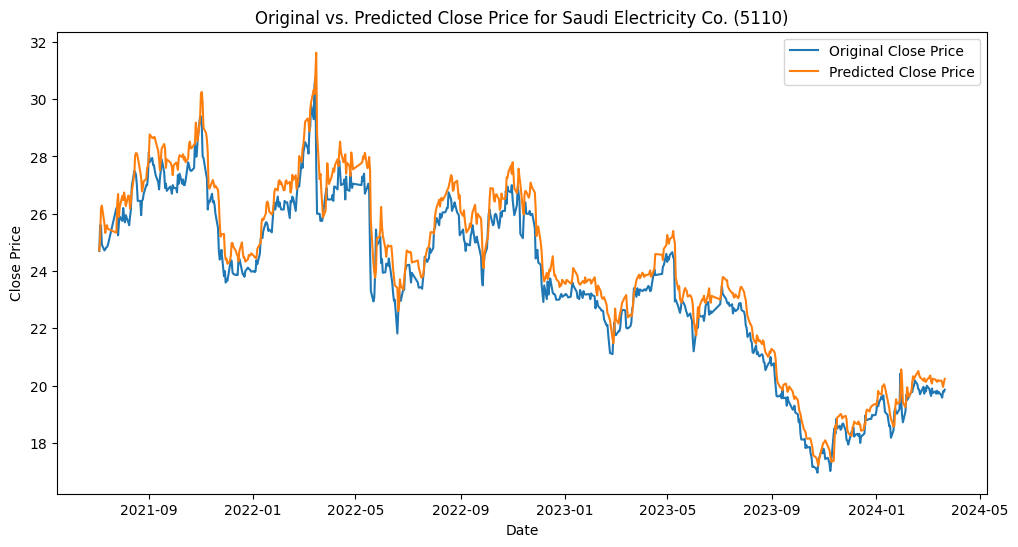

Metrics for Saudi Electricity Co. (5110):
Mean Squared Error: 0.5163222191515427
Mean Absolute Error: 0.5996136648495842


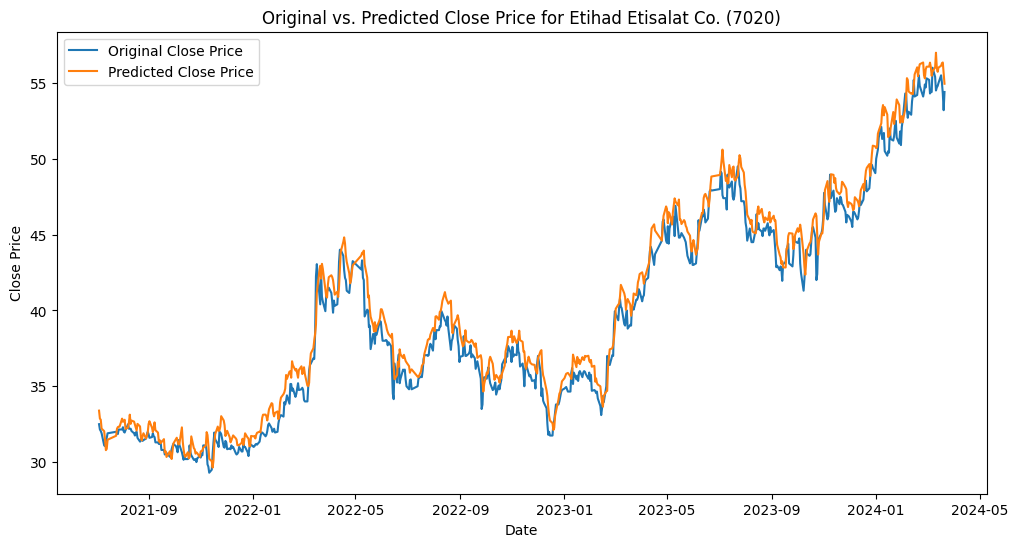

Metrics for Etihad Etisalat Co. (7020):
Mean Squared Error: 1.3749031903009479
Mean Absolute Error: 0.9543818786738145


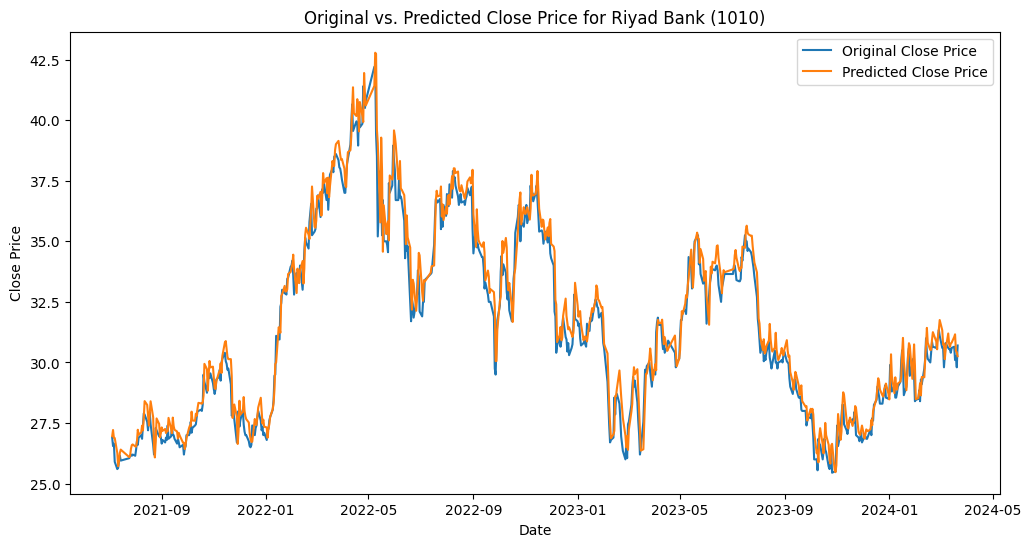

Metrics for Riyad Bank (1010):
Mean Squared Error: 0.5795051927780398
Mean Absolute Error: 0.5739993035881232


In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming df_features is your DataFrame after feature engineering
df = df_features.copy()

# Define the feature columns
feature_columns = ["% Change", 'RollingMean_10','RollingMean_5' 'MACD', 'RSI' ,'Close_lag_3', ]

# Create a new DataFrame with only the feature columns and the 'Close' column
data = df[feature_columns + ['Close', 'Symbol', 'Date', 'Company Name']]

# Handle missing values if any
data.dropna(inplace=True)

# Sort the DataFrame by 'Symbol' and 'Date' to maintain chronological order per stock
data.sort_values(['Symbol', 'Date'], inplace=True)
data.reset_index(drop=True, inplace=True)

# Initialize lists to collect data from all stocks
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []
symbols_test = []
dates_test = []
companies_test = []

# Define sequence length (same as in your original code)
sequence_length = 100  # This is the number of previous time steps to use

# Group by 'Symbol' to maintain the sequential nature for each stock
grouped = data.groupby('Symbol')

# Process each stock individually
for symbol, group in grouped:
    group = group.reset_index(drop=True)
    # Skip stocks with insufficient data
    if len(group) < sequence_length + 1:
        continue
    # Initialize scaler for each stock
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(group[feature_columns + ['Close']])
    group_scaled = pd.DataFrame(scaled_features, columns=feature_columns + ['Close'])
    group_scaled['Symbol'] = group['Symbol']
    group_scaled['Date'] = group['Date']
    group_scaled['Company Name'] = group['Company Name']
    
    # Create sequences for the stock
    X = []
    y = []
    for i in range(sequence_length, len(group_scaled)):
        X.append(group_scaled[feature_columns].iloc[i - sequence_length:i].values)
        y.append(group_scaled['Close'].iloc[i])
    X = np.array(X)
    y = np.array(y)
    
    # Skip this stock if no sequences were created
    if len(X) == 0:
        continue
    
    # Perform time-based train-test split for the stock
    train_size = int(len(X) * 0.8)
    X_train_stock, X_test_stock = X[:train_size], X[train_size:]
    y_train_stock, y_test_stock = y[:train_size], y[train_size:]
    
    # Skip this stock if training or testing sets are empty
    if len(X_train_stock) == 0 or len(X_test_stock) == 0:
        continue
    
    # Append to the global lists
    X_train_list.append(X_train_stock)
    y_train_list.append(y_train_stock)
    X_test_list.append(X_test_stock)
    y_test_list.append(y_test_stock)
    symbols_test.extend([symbol] * len(y_test_stock))
    dates_test.extend(group_scaled['Date'].iloc[sequence_length + train_size:].tolist())
    companies_test.extend(group_scaled['Company Name'].iloc[sequence_length + train_size:].tolist())

# Check if we have any data to train on
if not X_train_list:
    raise ValueError("No training data available after preprocessing.")

# Concatenate data from all stocks
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

# Build the LSTM model (using the same hyperparameters)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model (same optimizer and loss)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (same batch size and epochs)
model.fit(X_train, y_train, batch_size=64, epochs=2)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values per stock
inv_predictions = []
inv_y_test = []
symbols_predictions = []
dates_predictions = []
companies_predictions = []

start = 0
for symbol in data['Symbol'].unique():
    group = data[data['Symbol'] == symbol].reset_index(drop=True)
    # Skip stocks with insufficient data
    if len(group) < sequence_length + 1:
        continue
    # Number of test samples for this stock
    n_test = len([s for s in symbols_test if s == symbol])
    if n_test == 0:
        continue
    # Initialize scaler for this stock
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(group[feature_columns + ['Close']])
    
    # Get the predictions and y_test for this stock
    preds_stock = predictions[start:start + n_test]
    y_test_stock = y_test[start:start + n_test]
    X_test_stock = X_test[start:start + n_test]
    
    # Ensure shapes are consistent
    preds_stock = preds_stock.reshape(-1, 1)
    y_test_stock = y_test_stock.reshape(-1, 1)
    
    # Inverse transform
    def inverse_transform(scaler, X_data, y_data):
        y_data = y_data.reshape(-1, 1)
        X_last = X_data[:, -1, :]
        inv_data = np.concatenate((X_last, y_data), axis=1)
        inv_data = scaler.inverse_transform(inv_data)
        return inv_data[:, -1]
    
    inv_preds = inverse_transform(scaler, X_test_stock, preds_stock)
    inv_actuals = inverse_transform(scaler, X_test_stock, y_test_stock)
    
    inv_predictions.extend(inv_preds)
    inv_y_test.extend(inv_actuals)
    symbols_predictions.extend([symbol] * n_test)
    dates_predictions.extend(dates_test[start:start + n_test])
    companies_predictions.extend(companies_test[start:start + n_test])
    
    start += n_test

# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'Date': dates_predictions,
    'Symbol': symbols_predictions,
    'Company Name': companies_predictions,
    'Actual': inv_y_test,
    'Predicted': inv_predictions
})

# Function to plot predictions for specific stocks
def plot_predictions(stock_symbols, results_df):
    for symbol in stock_symbols:
        stock_results = results_df[results_df['Symbol'] == symbol]
        if stock_results.empty:
            print(f"No test data for stock symbol {symbol}")
            continue
        stock_results = stock_results.sort_values('Date')
        plt.figure(figsize=(12, 6))
        plt.plot(stock_results['Date'], stock_results['Actual'], label='Original Close Price')
        plt.plot(stock_results['Date'], stock_results['Predicted'], label='Predicted Close Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        company_name = stock_results['Company Name'].iloc[0]
        plt.title(f'Original vs. Predicted Close Price for {company_name} ({symbol})')
        plt.legend()
        plt.show()
        # Calculate and print metrics
        mse = mean_squared_error(stock_results['Actual'], stock_results['Predicted'])
        mae = mean_absolute_error(stock_results['Actual'], stock_results['Predicted'])
        print(f"Metrics for {company_name} ({symbol}):")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")

# List of stock symbols you want to plot (replace with actual symbols)
stock_symbols_to_plot = [5110, 7020, 1010]  # Replace with desired stock symbols

plot_predictions(stock_symbols_to_plot, results)


C:\Users\osama\AppData\Local\Temp\ipykernel_5508\932507093.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\osama\AppData\Local\Temp\ipykernel_5508\932507093.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['Symbol', 'Date'], inplace=True)
c:\Users\osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
7535/7535 ━━━━━━━━━━━━━━━━━━━━ 488s 64ms/step - loss: 0.0010
Epoch 2/2
7535/7535 ━━━━━━━━━━━━━━━━━━━━ 658s 87ms/step - loss: 3.4472e-04
3772/3772 ━━━━━━━━━━━━━━━━━━━━ 57s 15ms/step


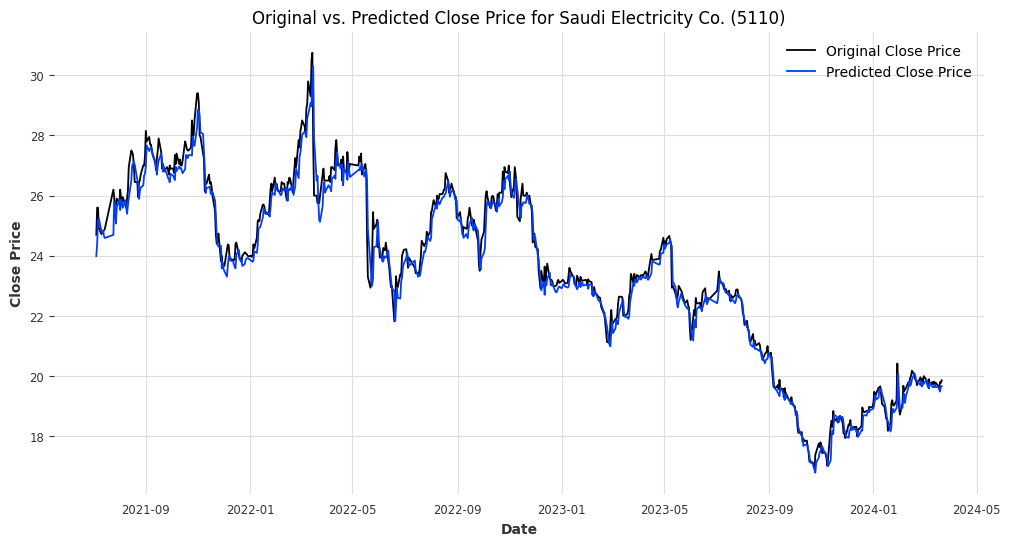

Metrics for Saudi Electricity Co. (5110):
Mean Squared Error: 0.1865540599445703
Mean Absolute Error: 0.305783970144117


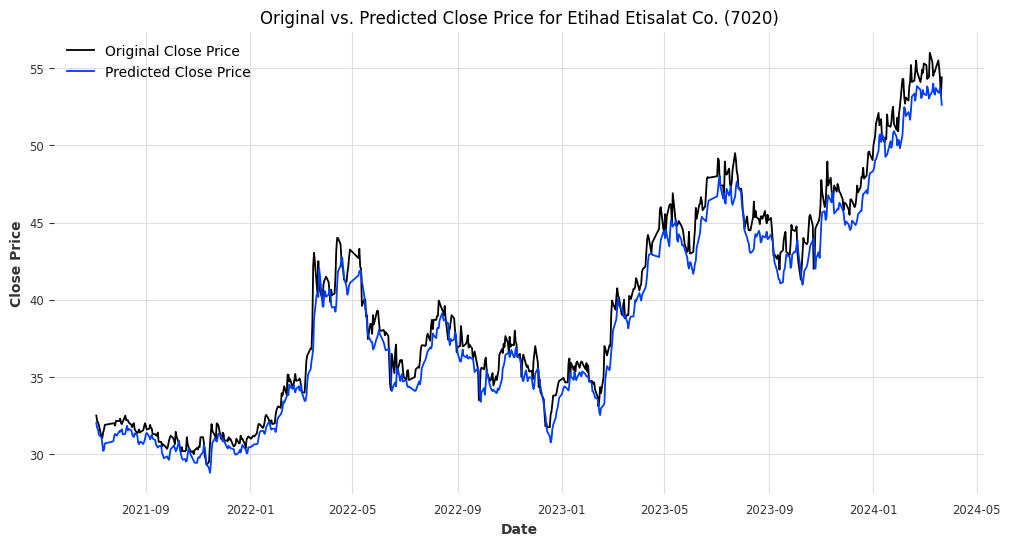

Metrics for Etihad Etisalat Co. (7020):
Mean Squared Error: 1.586018071056689
Mean Absolute Error: 1.027870039668666


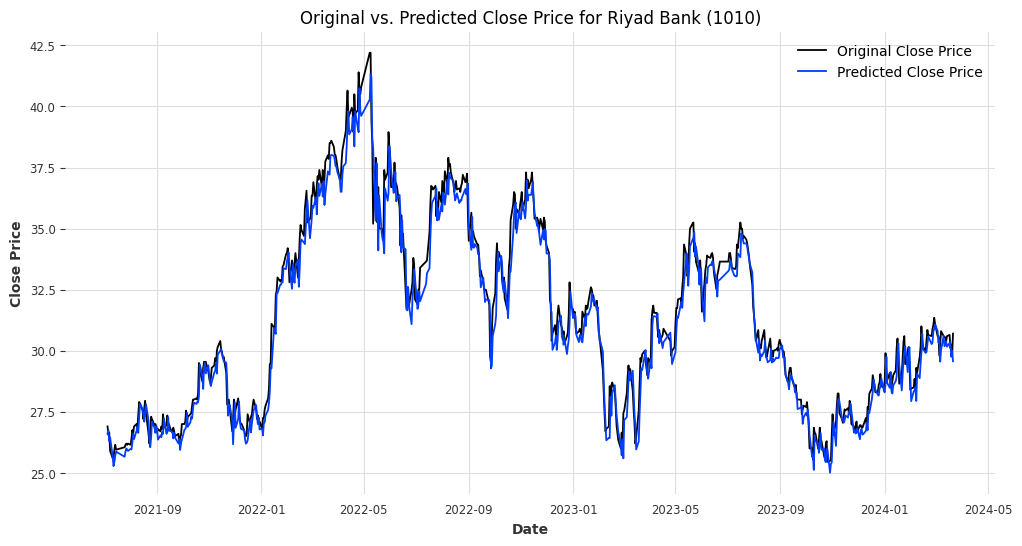

Metrics for Riyad Bank (1010):
Mean Squared Error: 0.499779210319614
Mean Absolute Error: 0.5359575906773918


In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming df_features is your DataFrame after feature engineering
df = df_features.copy()

# Define the feature columns
feature_columns = ["% Change", 'RollingMean_10','RollingMean_5', 'MACD', 'RSI' ,'Close_lag_3', ]

# Create a new DataFrame with only the feature columns and the 'Close' column
data = df[feature_columns + ['Close', 'Symbol', 'Date', 'Company Name']]

# Handle missing values if any
data.dropna(inplace=True)

# Sort the DataFrame by 'Symbol' and 'Date' to maintain chronological order per stock
data.sort_values(['Symbol', 'Date'], inplace=True)
data.reset_index(drop=True, inplace=True)

# Initialize lists to collect data from all stocks
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []
symbols_test = []
dates_test = []
companies_test = []

# Define sequence length (same as in your original code)
sequence_length = 100  # This is the number of previous time steps to use

# Group by 'Symbol' to maintain the sequential nature for each stock
grouped = data.groupby('Symbol')

# Process each stock individually
for symbol, group in grouped:
    group = group.reset_index(drop=True)
    # Skip stocks with insufficient data
    if len(group) < sequence_length + 1:
        continue
    # Initialize scaler for each stock
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(group[feature_columns + ['Close']])
    group_scaled = pd.DataFrame(scaled_features, columns=feature_columns + ['Close'])
    group_scaled['Symbol'] = group['Symbol']
    group_scaled['Date'] = group['Date']
    group_scaled['Company Name'] = group['Company Name']
    
    # Create sequences for the stock
    X = []
    y = []
    for i in range(sequence_length, len(group_scaled)):
        X.append(group_scaled[feature_columns].iloc[i - sequence_length:i].values)
        y.append(group_scaled['Close'].iloc[i])
    X = np.array(X)
    y = np.array(y)
    
    # Skip this stock if no sequences were created
    if len(X) == 0:
        continue
    
    # Perform time-based train-test split for the stock
    train_size = int(len(X) * 0.8)
    X_train_stock, X_test_stock = X[:train_size], X[train_size:]
    y_train_stock, y_test_stock = y[:train_size], y[train_size:]
    
    # Skip this stock if training or testing sets are empty
    if len(X_train_stock) == 0 or len(X_test_stock) == 0:
        continue
    
    # Append to the global lists
    X_train_list.append(X_train_stock)
    y_train_list.append(y_train_stock)
    X_test_list.append(X_test_stock)
    y_test_list.append(y_test_stock)
    symbols_test.extend([symbol] * len(y_test_stock))
    dates_test.extend(group_scaled['Date'].iloc[sequence_length + train_size:].tolist())
    companies_test.extend(group_scaled['Company Name'].iloc[sequence_length + train_size:].tolist())

# Check if we have any data to train on
if not X_train_list:
    raise ValueError("No training data available after preprocessing.")

# Concatenate data from all stocks
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

# Build the LSTM model (using the same hyperparameters)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model (same optimizer and loss)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (same batch size and epochs)
model.fit(X_train, y_train, batch_size=64, epochs=2)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values per stock
inv_predictions = []
inv_y_test = []
symbols_predictions = []
dates_predictions = []
companies_predictions = []

start = 0
for symbol in data['Symbol'].unique():
    group = data[data['Symbol'] == symbol].reset_index(drop=True)
    # Skip stocks with insufficient data
    if len(group) < sequence_length + 1:
        continue
    # Number of test samples for this stock
    n_test = len([s for s in symbols_test if s == symbol])
    if n_test == 0:
        continue
    # Initialize scaler for this stock
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(group[feature_columns + ['Close']])
    
    # Get the predictions and y_test for this stock
    preds_stock = predictions[start:start + n_test]
    y_test_stock = y_test[start:start + n_test]
    X_test_stock = X_test[start:start + n_test]
    
    # Ensure shapes are consistent
    preds_stock = preds_stock.reshape(-1, 1)
    y_test_stock = y_test_stock.reshape(-1, 1)
    
    # Inverse transform
    def inverse_transform(scaler, X_data, y_data):
        y_data = y_data.reshape(-1, 1)
        X_last = X_data[:, -1, :]
        inv_data = np.concatenate((X_last, y_data), axis=1)
        inv_data = scaler.inverse_transform(inv_data)
        return inv_data[:, -1]
    
    inv_preds = inverse_transform(scaler, X_test_stock, preds_stock)
    inv_actuals = inverse_transform(scaler, X_test_stock, y_test_stock)
    
    inv_predictions.extend(inv_preds)
    inv_y_test.extend(inv_actuals)
    symbols_predictions.extend([symbol] * n_test)
    dates_predictions.extend(dates_test[start:start + n_test])
    companies_predictions.extend(companies_test[start:start + n_test])
    
    start += n_test

# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'Date': dates_predictions,
    'Symbol': symbols_predictions,
    'Company Name': companies_predictions,
    'Actual': inv_y_test,
    'Predicted': inv_predictions
})

# Function to plot predictions for specific stocks
def plot_predictions(stock_symbols, results_df):
    for symbol in stock_symbols:
        stock_results = results_df[results_df['Symbol'] == symbol]
        if stock_results.empty:
            print(f"No test data for stock symbol {symbol}")
            continue
        stock_results = stock_results.sort_values('Date')
        plt.figure(figsize=(12, 6))
        plt.plot(stock_results['Date'], stock_results['Actual'], label='Original Close Price')
        plt.plot(stock_results['Date'], stock_results['Predicted'], label='Predicted Close Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        company_name = stock_results['Company Name'].iloc[0]
        plt.title(f'Original vs. Predicted Close Price for {company_name} ({symbol})')
        plt.legend()
        plt.show()
        # Calculate and print metrics
        mse = mean_squared_error(stock_results['Actual'], stock_results['Predicted'])
        mae = mean_absolute_error(stock_results['Actual'], stock_results['Predicted'])
        print(f"Metrics for {company_name} ({symbol}):")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")

# List of stock symbols you want to plot (replace with actual symbols)
stock_symbols_to_plot = [5110, 7020, 1010]  # Replace with desired stock symbols

plot_predictions(stock_symbols_to_plot, results)


c:\Users\osama\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
7535/7535 ━━━━━━━━━━━━━━━━━━━━ 490s 65ms/step - loss: 0.0012
Epoch 2/2
7535/7535 ━━━━━━━━━━━━━━━━━━━━ 493s 65ms/step - loss: 3.2629e-04
3772/3772 ━━━━━━━━━━━━━━━━━━━━ 60s 16ms/step


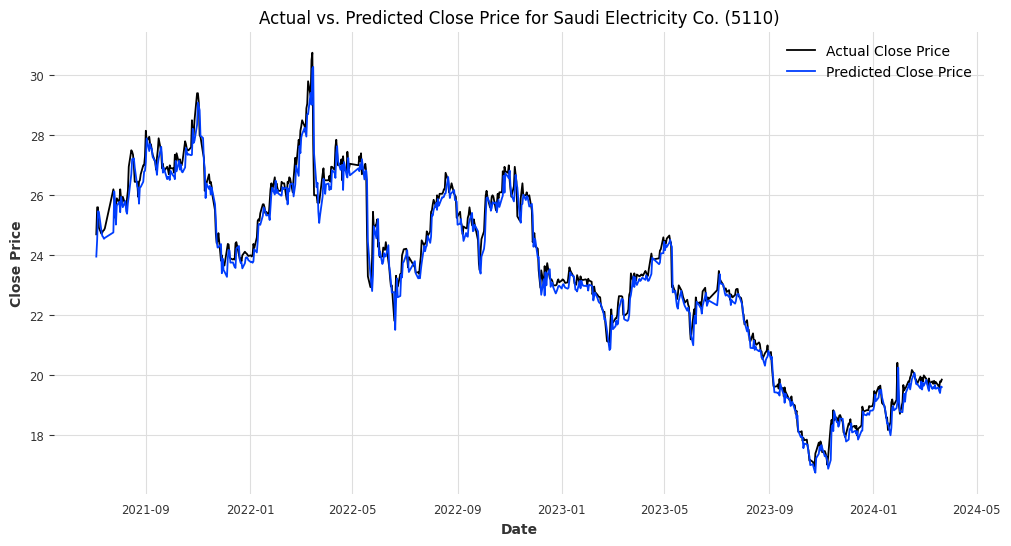

Metrics for Saudi Electricity Co. (5110):
Mean Squared Error: 0.1754592524171494
Mean Absolute Error: 0.30381818052765736


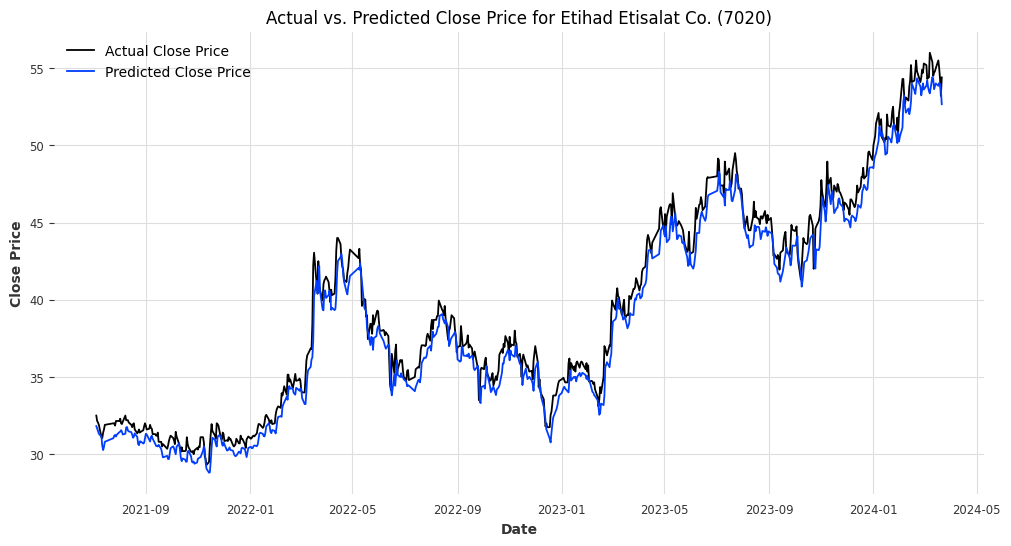

Metrics for Etihad Etisalat Co. (7020):
Mean Squared Error: 1.1964719278366718
Mean Absolute Error: 0.9108108546778205


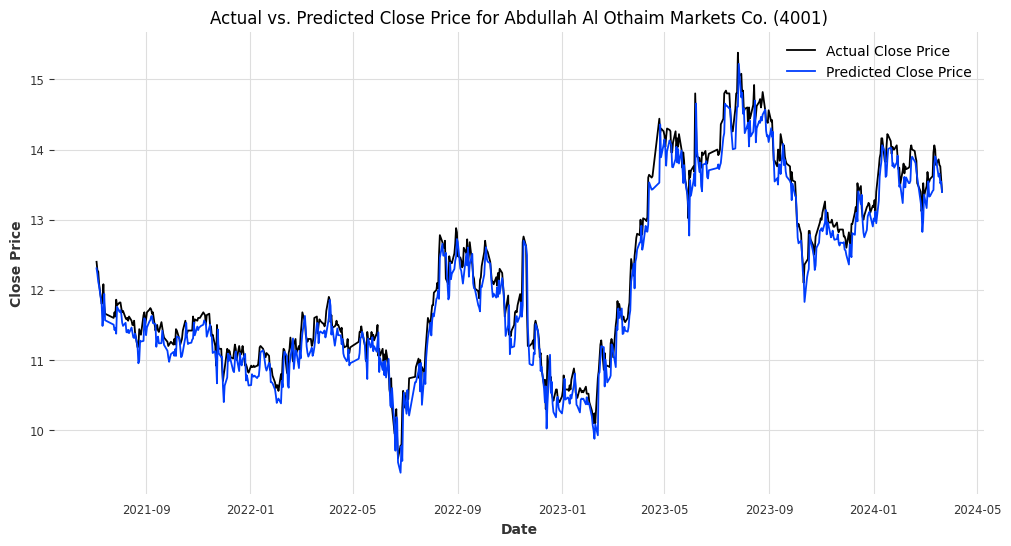

Metrics for Abdullah Al Othaim Markets Co. (4001):
Mean Squared Error: 0.06562414150126149
Mean Absolute Error: 0.2021775774978595


In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

# Assuming df_features is your DataFrame after feature engineering
df = df_features.copy()

# Define the feature columns, including 'Close' to have previous close prices directly
feature_columns = ["% Change", 'RollingMean_10', 'MACD', 'RSI', 'Close']

# Ensure 'Close' is included in the DataFrame
if 'Close' not in df.columns:
    df['Close'] = df['Close']

# Handle missing values if any
df.dropna(subset=feature_columns, inplace=True)

# Sort the DataFrame by 'Symbol' and 'Date' to maintain chronological order per stock
df.sort_values(['Symbol', 'Date'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Initialize lists to collect data from all stocks
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []
symbols_test = []
dates_test = []
companies_test = []

# Define sequence length (same as in your original code)
sequence_length = 100  # This is the number of previous time steps to use

# Group by 'Symbol' to maintain the sequential nature for each stock
grouped = df.groupby('Symbol')

# Process each stock individually
for symbol, group in grouped:
    group = group.reset_index(drop=True)
    # Skip stocks with insufficient data
    if len(group) < sequence_length + 1:
        continue
    # Initialize scaler for each stock
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(group[feature_columns])
    group_scaled = pd.DataFrame(scaled_features, columns=feature_columns)
    group_scaled['Symbol'] = group['Symbol']
    group_scaled['Date'] = group['Date']
    group_scaled['Company Name'] = group['Company Name']
    
    # Create sequences for the stock
    X = []
    y = []
    for i in range(sequence_length, len(group_scaled)):
        # Ensure that the sequence at time t includes data up to time t-1
        X_sequence = group_scaled[feature_columns].iloc[i - sequence_length:i].values
        y_value = group_scaled['Close'].iloc[i]  # Predicting the Close price at time t
        X.append(X_sequence)
        y.append(y_value)
    X = np.array(X)
    y = np.array(y)
    
    # Skip this stock if no sequences were created
    if len(X) == 0:
        continue
    
    # Perform time-based train-test split for the stock
    train_size = int(len(X) * 0.8)
    X_train_stock, X_test_stock = X[:train_size], X[train_size:]
    y_train_stock, y_test_stock = y[:train_size], y[train_size:]
    
    # Skip this stock if training or testing sets are empty
    if len(X_train_stock) == 0 or len(X_test_stock) == 0:
        continue
    
    # Append to the global lists
    X_train_list.append(X_train_stock)
    y_train_list.append(y_train_stock)
    X_test_list.append(X_test_stock)
    y_test_list.append(y_test_stock)
    symbols_test.extend([symbol] * len(y_test_stock))
    dates_test.extend(group_scaled['Date'].iloc[sequence_length + train_size:].tolist())
    companies_test.extend(group_scaled['Company Name'].iloc[sequence_length + train_size:].tolist())

# Check if we have any data to train on
if not X_train_list:
    raise ValueError("No training data available after preprocessing.")

# Concatenate data from all stocks
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

# Build the LSTM model (using the same hyperparameters)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, len(feature_columns))))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model (same optimizer and loss)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (same batch size and epochs)
model.fit(X_train, y_train, batch_size=64, epochs=2)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values per stock
inv_predictions = []
inv_y_test = []
symbols_predictions = []
dates_predictions = []
companies_predictions = []

start = 0
for symbol in df['Symbol'].unique():
    group = df[df['Symbol'] == symbol].reset_index(drop=True)
    # Skip stocks with insufficient data
    if len(group) < sequence_length + 1:
        continue
    # Number of test samples for this stock
    n_test = len([s for s in symbols_test if s == symbol])
    if n_test == 0:
        continue
    # Initialize scaler for this stock
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(group[feature_columns])
    
    # Get the predictions and y_test for this stock
    preds_stock = predictions[start:start + n_test]
    y_test_stock = y_test[start:start + n_test]
    X_test_stock = X_test[start:start + n_test]
    
    # Ensure shapes are consistent
    preds_stock = preds_stock.reshape(-1, 1)
    y_test_stock = y_test_stock.reshape(-1, 1)
    
    # Inverse transform
    def inverse_transform(scaler, X_data, y_data):
        y_data = y_data.reshape(-1, 1)
        # Concatenate with zeros for other features except 'Close'
        zeros = np.zeros((y_data.shape[0], len(feature_columns) - 1))
        inv_data = np.concatenate((zeros, y_data), axis=1)
        inv_data = scaler.inverse_transform(inv_data)
        return inv_data[:, -1]  # Assuming 'Close' is the last feature
    
    inv_preds = inverse_transform(scaler, X_test_stock, preds_stock)
    inv_actuals = inverse_transform(scaler, X_test_stock, y_test_stock)
    
    inv_predictions.extend(inv_preds)
    inv_y_test.extend(inv_actuals)
    symbols_predictions.extend([symbol] * n_test)
    dates_predictions.extend(dates_test[start:start + n_test])
    companies_predictions.extend(companies_test[start:start + n_test])
    
    start += n_test

# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'Date': dates_predictions,
    'Symbol': symbols_predictions,
    'Company Name': companies_predictions,
    'Actual': inv_y_test,
    'Predicted': inv_predictions
})

# Function to plot predictions for specific stocks
def plot_predictions(stock_symbols, results_df):
    for symbol in stock_symbols:
        stock_results = results_df[results_df['Symbol'] == symbol]
        if stock_results.empty:
            print(f"No test data for stock symbol {symbol}")
            continue
        stock_results = stock_results.sort_values('Date')
        plt.figure(figsize=(12, 6))
        plt.plot(stock_results['Date'], stock_results['Actual'], label='Actual Close Price')
        plt.plot(stock_results['Date'], stock_results['Predicted'], label='Predicted Close Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        company_name = stock_results['Company Name'].iloc[0]
        plt.title(f'Actual vs. Predicted Close Price for {company_name} ({symbol})')
        plt.legend()
        plt.show()
        # Calculate and print metrics
        mse = mean_squared_error(stock_results['Actual'], stock_results['Predicted'])
        mae = mean_absolute_error(stock_results['Actual'], stock_results['Predicted'])
        print(f"Metrics for {company_name} ({symbol}):")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")

# List of stock symbols you want to plot (replace with actual symbols)
stock_symbols_to_plot = [5110, 7020, 4001]  # Replace with desired stock symbols

plot_predictions(stock_symbols_to_plot, results)


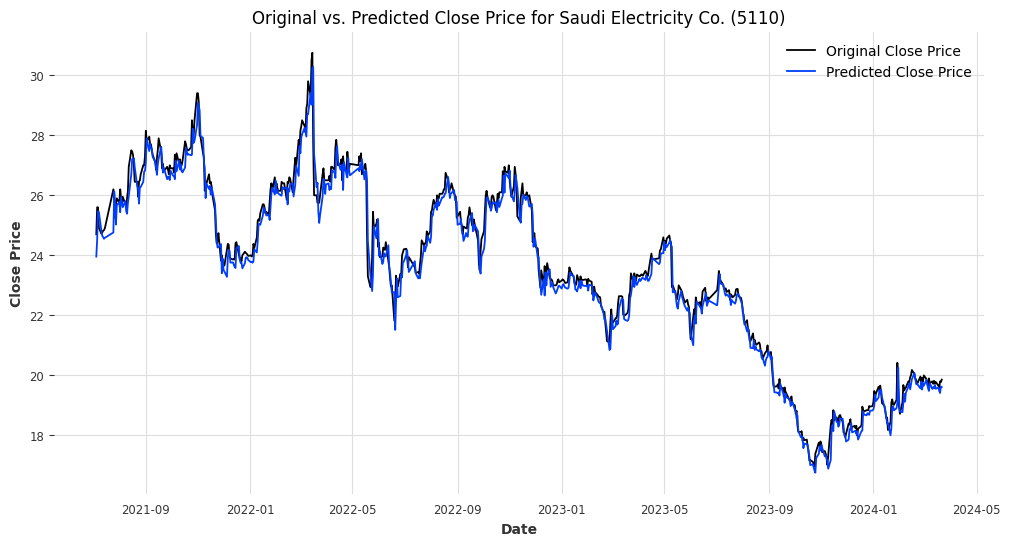

Metrics for Saudi Electricity Co. (5110):
Mean Squared Error: 0.1754592524171494
Mean Absolute Error: 0.30381818052765736


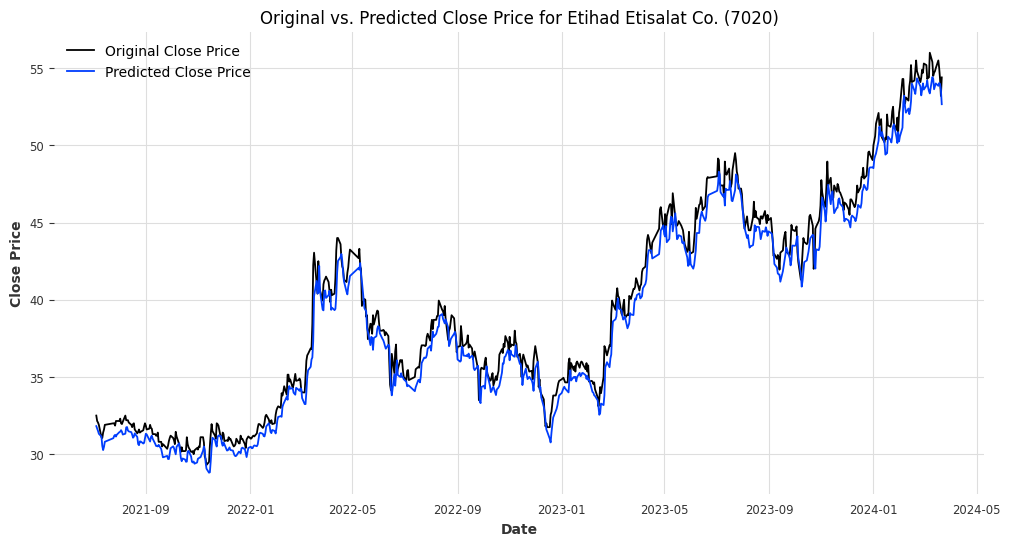

Metrics for Etihad Etisalat Co. (7020):
Mean Squared Error: 1.1964719278366718
Mean Absolute Error: 0.9108108546778205


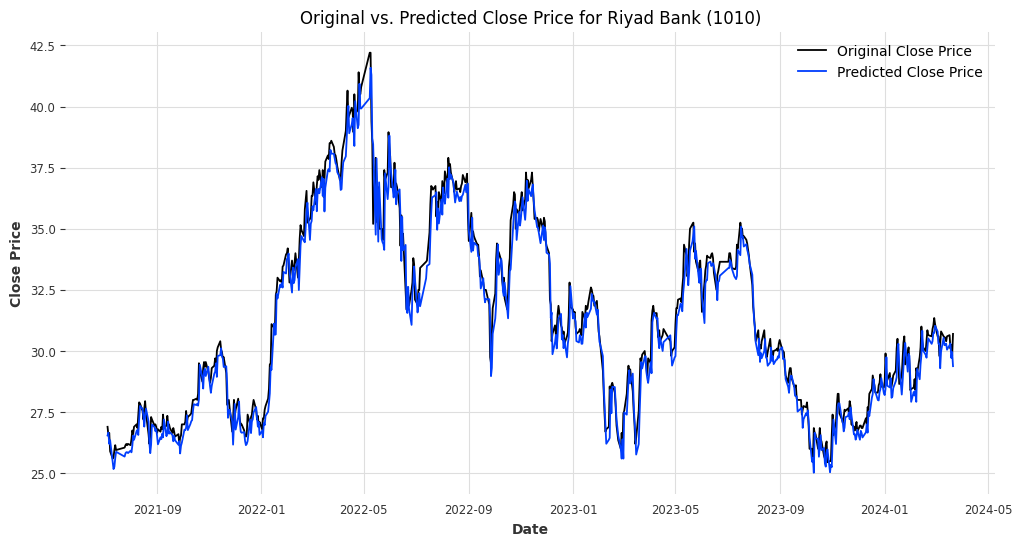

Metrics for Riyad Bank (1010):
Mean Squared Error: 0.5118090820858
Mean Absolute Error: 0.5478377033871163


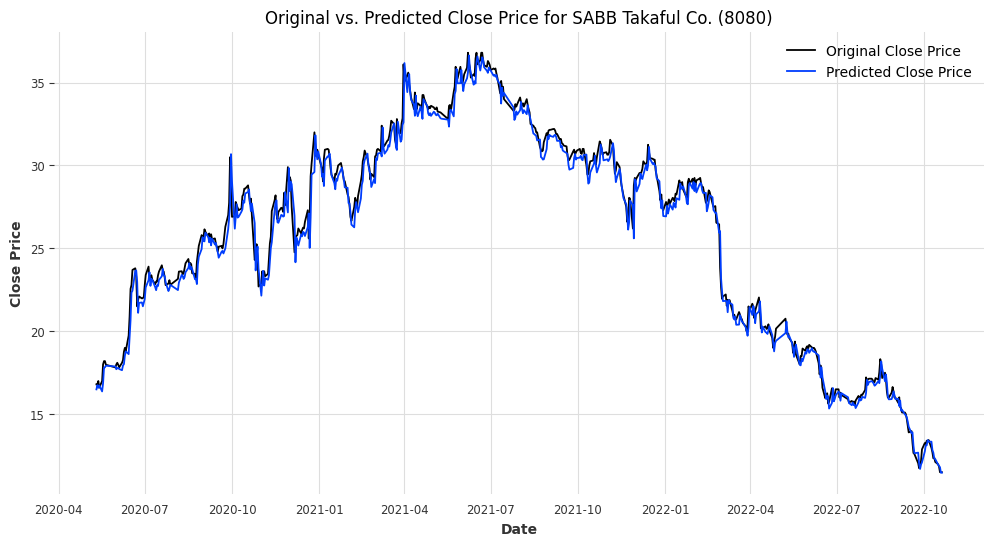

Metrics for SABB Takaful Co. (8080):
Mean Squared Error: 0.43526910710802175
Mean Absolute Error: 0.4764669816709351


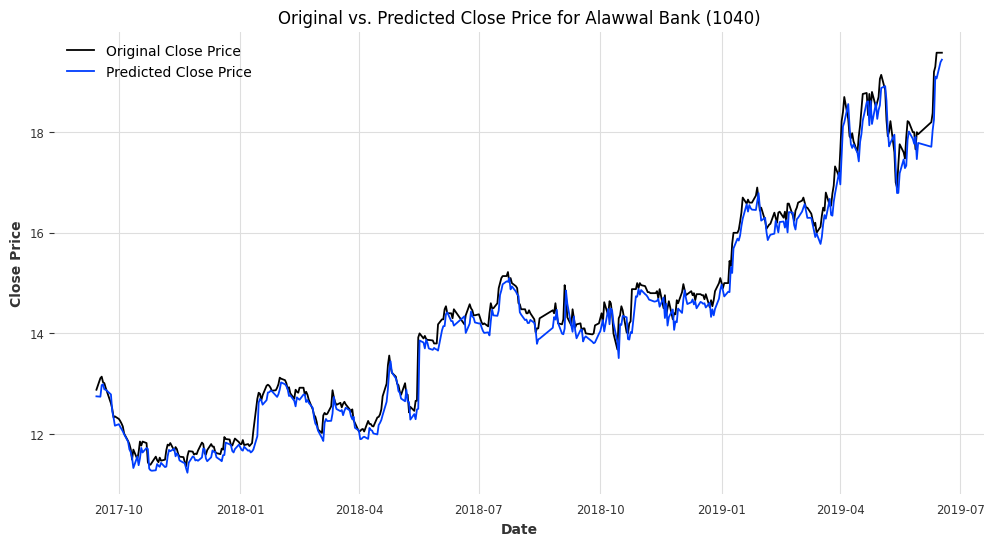

Metrics for Alawwal Bank (1040):
Mean Squared Error: 0.06769754689922558
Mean Absolute Error: 0.20032370484688103


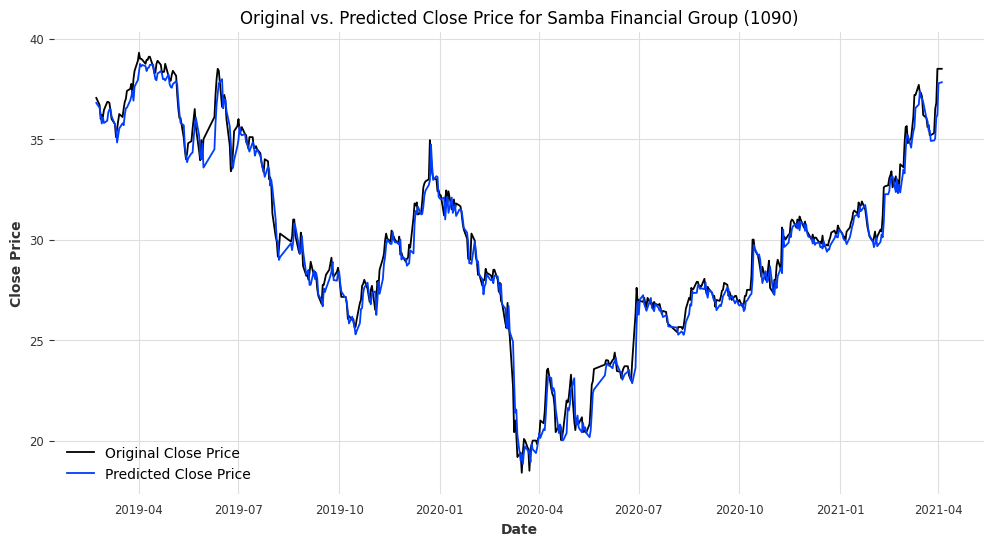

Metrics for Samba Financial Group (1090):
Mean Squared Error: 0.40626038769370226
Mean Absolute Error: 0.4778807513702589


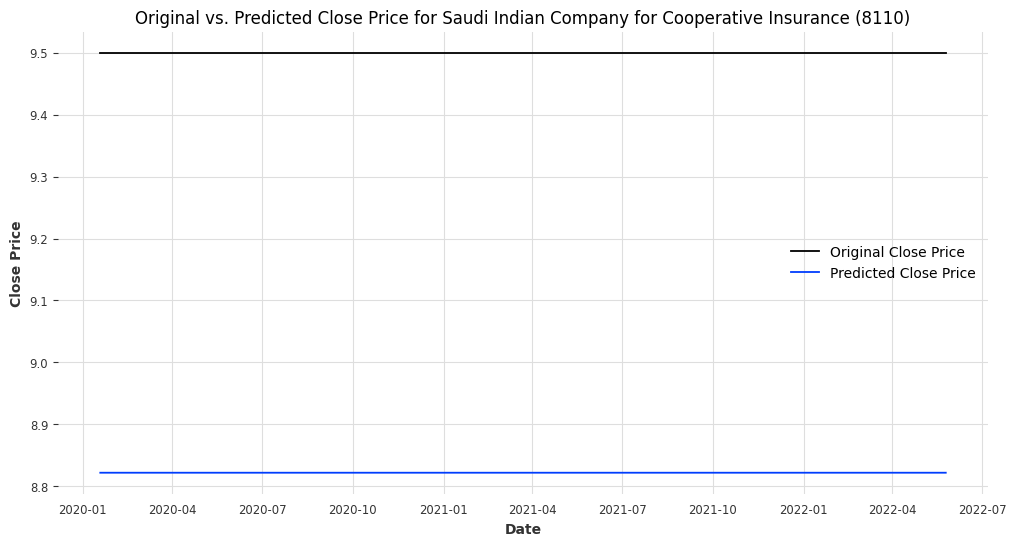

Metrics for Saudi Indian Company for Cooperative Insurance (8110):
Mean Squared Error: 0.45981250315777056
Mean Absolute Error: 0.678094759718523


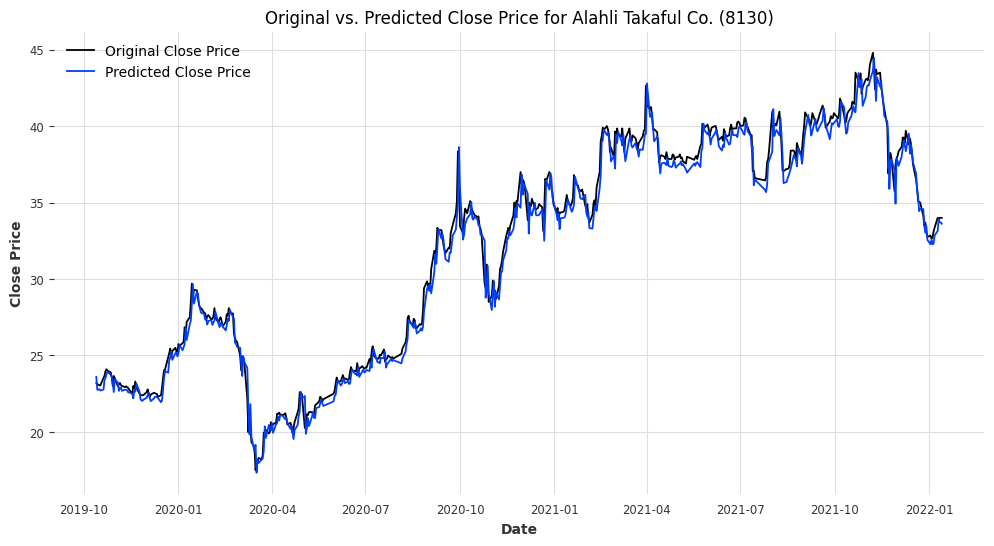

Metrics for Alahli Takaful Co. (8130):
Mean Squared Error: 0.5915539667904436
Mean Absolute Error: 0.5732726584434483


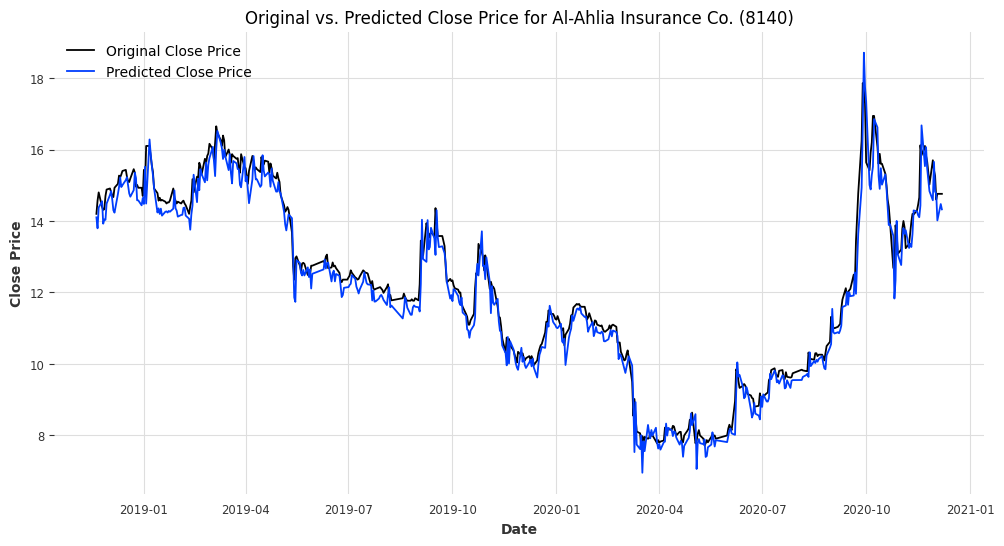

Metrics for Al-Ahlia Insurance Co. (8140):
Mean Squared Error: 0.18186547777609333
Mean Absolute Error: 0.3188750869568732


In [111]:
def plot_predictions(stock_symbols, results_df):
    for symbol in stock_symbols:
        stock_results = results_df[results_df['Symbol'] == symbol]
        if stock_results.empty:
            print(f"No test data for stock symbol {symbol}")
            continue
        stock_results = stock_results.sort_values('Date')
        plt.figure(figsize=(12, 6))
        plt.plot(stock_results['Date'], stock_results['Actual'], label='Original Close Price')
        plt.plot(stock_results['Date'], stock_results['Predicted'], label='Predicted Close Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        company_name = stock_results['Company Name'].iloc[0]
        plt.title(f'Original vs. Predicted Close Price for {company_name} ({symbol})')
        plt.legend()
        plt.show()
        # Calculate and print metrics
        mse = mean_squared_error(stock_results['Actual'], stock_results['Predicted'])
        mae = mean_absolute_error(stock_results['Actual'], stock_results['Predicted'])
        print(f"Metrics for {company_name} ({symbol}):")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")

# List of stock symbols you want to plot (replace with actual symbols)
stock_symbols_to_plot = [5110, 7020, 1010,8080,1040,1090,8110,8130,8140]  # Replace with desired stock symbols

plot_predictions(stock_symbols_to_plot, results)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [ ]:
df

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.